In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Wave Height Prediction - Exploratory Analysis

## Overview
This notebook documents the R&D process before productionisation.

**Note:** Exploratory work was refactored into production scripts in `src/` for reproducibility and deployment. View the called functions in `src/` for details. 

# Simple Model with MLflow and Optuna

Simple model to predict significant wave height of one buoy based on another buoy's data.

- `optuna` was used to optimise hyperparameters.
- `mlflow` was used to document model optimisation details.

In [2]:
import logging
import pickle
import warnings

import numpy as np

from marine_ml.constants import MODEL_DIR
from marine_ml.data_loading import get_marine_data
from marine_ml.plots import plot_sig_wave_height, plot_wave_direction_roses
from marine_ml.train import get_preprocessed_data, split_data

warnings.filterwarnings("ignore")

logging.basicConfig(level=logging.INFO)

logger = logging.getLogger("exploration")

/Users/s-northover-naylor/GitHub/marine-ml-pipeline/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data Exploration

Load the raw data. Porthleven buoy ID is `107` and Penzance `75`. 

In [3]:
data = get_marine_data()
data.head(3)

,wave_height_significant_m;75,wave_height_max_m;75,sea_surface_temperature_degc;75,wave_period_peak_s;75,wave_period_mean_s;75,wave_direction_deg;75,directional_wave_spread_deg;75,wave_height_significant_m;107,wave_height_max_m;107,sea_surface_temperature_degc;107,wave_period_peak_s;107,wave_period_mean_s;107,wave_direction_deg;107,directional_wave_spread_deg;107
2025-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.73,5.34,11.55,11.11,7.018,216.6,19.1
2025-01-06 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.75,4.11,11.55,11.76,7.018,219.4,15.6
2025-01-06 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.35,4.66,11.55,10.53,6.780,222.2,20.5


As expected, Porthleven (`107`) measures greater significant wave height compared to Penzance (`75`); Penzance is sheltered from swell by Lands End Penninsula.

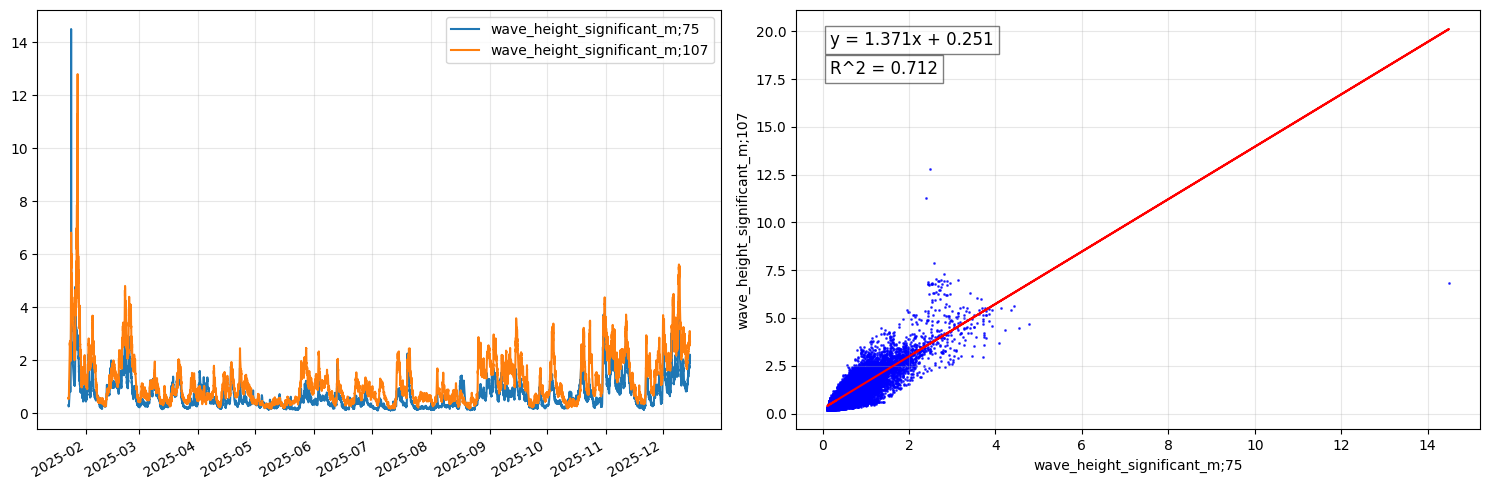

In [4]:
plot_sig_wave_height(data)

As expected, Penzance (75) has a more southerly wave direction as the waves refract around Lands End Penninsula, while Porthleven (107) contains a more westerly component.

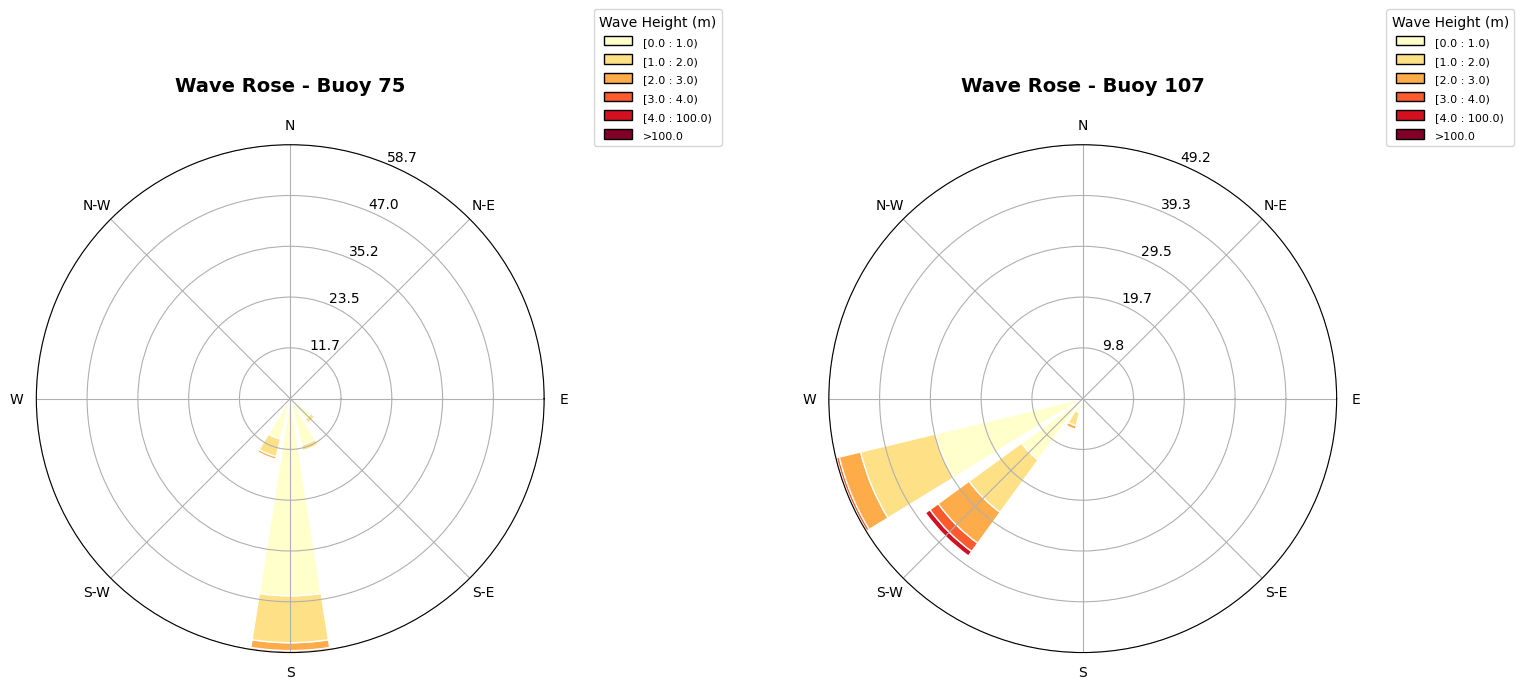

In [5]:
plot_wave_direction_roses(data)

## Load & Preprocess Data

- load the raw data
- perform some basic feature engineering
- split data for train/test

In [6]:
X, y = get_preprocessed_data()
X_train, X_test, y_train, y_test = split_data(X, y)

INFO:marine_ml.prepare_data:Loading preprocessed from cache.


## Train

- train model
- optimise hyperparameters

The model with optimised hyperparameters is saved as the main model in the MLflow UI. The models trialled during the hyperparameter tuning are visible as child runs in the MLflow UI.

In [7]:
%%bash
# Start MLflow UI
poe mlflow-start

Poe => nohup uv run mlflow ui > mlflow.log 2>&1 &


INFO:marine_ml.helpers.optuna_helper:Hyperparameter optimsation with Optuna
Best trial: 0. Best value: 0.125642:   5%|▎      | 1/20 [00:00<00:10,  1.76it/s]

🏃 View run overjoyed-newt-698 at: http://localhost:5000/#/experiments/0/runs/9b407fa67b754816867935b658a235b4
🧪 View experiment at: http://localhost:5000/#/experiments/0


INFO:marine_ml.helpers.optuna_helper:Trial 1 achieved value: 0.10789445565890603 with  16.4485% improvement
Best trial: 1. Best value: 0.107894:  10%|▋      | 2/20 [00:01<00:13,  1.29it/s]

🏃 View run fun-grub-764 at: http://localhost:5000/#/experiments/0/runs/9bd613b8e7e744eaaba0feb16a1588a7
🧪 View experiment at: http://localhost:5000/#/experiments/0


INFO:marine_ml.helpers.optuna_helper:Trial 2 achieved value: 0.10736346134397962 with  0.4946% improvement
Best trial: 2. Best value: 0.107363:  15%|█      | 3/20 [00:02<00:18,  1.09s/it]

🏃 View run bold-fish-398 at: http://localhost:5000/#/experiments/0/runs/08dc9b2dc0804bdcab1f4c80b6dee2dc
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 2. Best value: 0.107363:  20%|█▍     | 4/20 [00:04<00:17,  1.09s/it]

🏃 View run brawny-roo-471 at: http://localhost:5000/#/experiments/0/runs/dca1c0c762d449419b6cd838d184d7c0
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 2. Best value: 0.107363:  25%|█▊     | 5/20 [00:04<00:12,  1.23it/s]

🏃 View run awesome-trout-238 at: http://localhost:5000/#/experiments/0/runs/7100acd8b5f7419a99162e877d29697a
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 2. Best value: 0.107363:  30%|██     | 6/20 [00:04<00:09,  1.44it/s]

🏃 View run classy-pig-429 at: http://localhost:5000/#/experiments/0/runs/6500677ec7b0488f9a001f3a2c05b90d
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 2. Best value: 0.107363:  35%|██▍    | 7/20 [00:06<00:12,  1.04it/s]

🏃 View run sedate-ox-105 at: http://localhost:5000/#/experiments/0/runs/1fdab912c8f040b79cb2c7bb716a3254
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 2. Best value: 0.107363:  40%|██▊    | 8/20 [00:07<00:13,  1.11s/it]

🏃 View run bustling-asp-827 at: http://localhost:5000/#/experiments/0/runs/ce3c9450d63749ceb48d43cb17ecf81d
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 2. Best value: 0.107363:  45%|███▏   | 9/20 [00:08<00:11,  1.07s/it]

🏃 View run rebellious-kite-370 at: http://localhost:5000/#/experiments/0/runs/1ed3d551b5874f149764aadc8e03ed22
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 2. Best value: 0.107363:  50%|███   | 10/20 [00:09<00:09,  1.11it/s]

🏃 View run carefree-colt-612 at: http://localhost:5000/#/experiments/0/runs/2b0b3014e6654f77ae297453e1ea493f
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 2. Best value: 0.107363:  55%|███▎  | 11/20 [00:10<00:08,  1.06it/s]

🏃 View run sassy-bat-994 at: http://localhost:5000/#/experiments/0/runs/be653f8376274d778704b1ea6b1ec81f
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 2. Best value: 0.107363:  60%|███▌  | 12/20 [00:11<00:07,  1.07it/s]

🏃 View run unique-fowl-556 at: http://localhost:5000/#/experiments/0/runs/196ced6024d04a8da198c7b3f9f44d25
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 2. Best value: 0.107363:  65%|███▉  | 13/20 [00:12<00:06,  1.02it/s]

🏃 View run nebulous-hawk-549 at: http://localhost:5000/#/experiments/0/runs/1d82a7397753432fa77e40b597bd7d61
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 2. Best value: 0.107363:  70%|████▏ | 14/20 [00:13<00:07,  1.18s/it]

🏃 View run sneaky-gnu-62 at: http://localhost:5000/#/experiments/0/runs/35e75ec8c55f41f7a6185404f4b186dc
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 2. Best value: 0.107363:  75%|████▌ | 15/20 [00:14<00:05,  1.11s/it]

🏃 View run merciful-steed-605 at: http://localhost:5000/#/experiments/0/runs/009528d67111463a92a8c6cf5159c8f7
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 2. Best value: 0.107363:  80%|████▊ | 16/20 [00:16<00:04,  1.13s/it]

🏃 View run tasteful-ray-829 at: http://localhost:5000/#/experiments/0/runs/12bfd79d8be14cd6b9e962dbf41aed4d
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 2. Best value: 0.107363:  85%|█████ | 17/20 [00:16<00:02,  1.06it/s]

🏃 View run rare-bird-748 at: http://localhost:5000/#/experiments/0/runs/e042e88c35f245e6860bbc6ba7ef58d1
🧪 View experiment at: http://localhost:5000/#/experiments/0


INFO:marine_ml.helpers.optuna_helper:Trial 17 achieved value: 0.10631084641267367 with  0.9901% improvement
Best trial: 17. Best value: 0.106311:  90%|████▌| 18/20 [00:18<00:02,  1.24s/it]

🏃 View run carefree-ape-876 at: http://localhost:5000/#/experiments/0/runs/2d16b5769eac4cfd9cef2cb6ccf5e7b7
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 17. Best value: 0.106311:  95%|████▊| 19/20 [00:20<00:01,  1.32s/it]

🏃 View run grandiose-worm-436 at: http://localhost:5000/#/experiments/0/runs/0651b7ef14ec49df901ebf447c8e516c
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 17. Best value: 0.106311: 100%|█████| 20/20 [00:21<00:00,  1.08s/it]

🏃 View run smiling-mule-299 at: http://localhost:5000/#/experiments/0/runs/07dec369efe049488c76689d03c468fd
🧪 View experiment at: http://localhost:5000/#/experiments/0



INFO:marine_ml.helpers.optuna_helper:Evaluating model
2025/12/28 20:04:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
Registered model 'model-pz-to-lev' already exists. Creating a new version of this model...
2025/12/28 20:04:57 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model-pz-to-lev, version 61
Created version '61' of model 'model-pz-to-lev'.
INFO:marine_ml.helpers.optuna_helper:Model registered as 'model-pz-to-lev' version 61
INFO:marine_ml.helpers.optuna_helper:Promoted to 'Production' stage.


🏃 View run pz_predict_lev_run at: http://localhost:5000/#/experiments/1/runs/dfc8f889af5e433e9f4185c94d222fda
🧪 View experiment at: http://localhost:5000/#/experiments/1


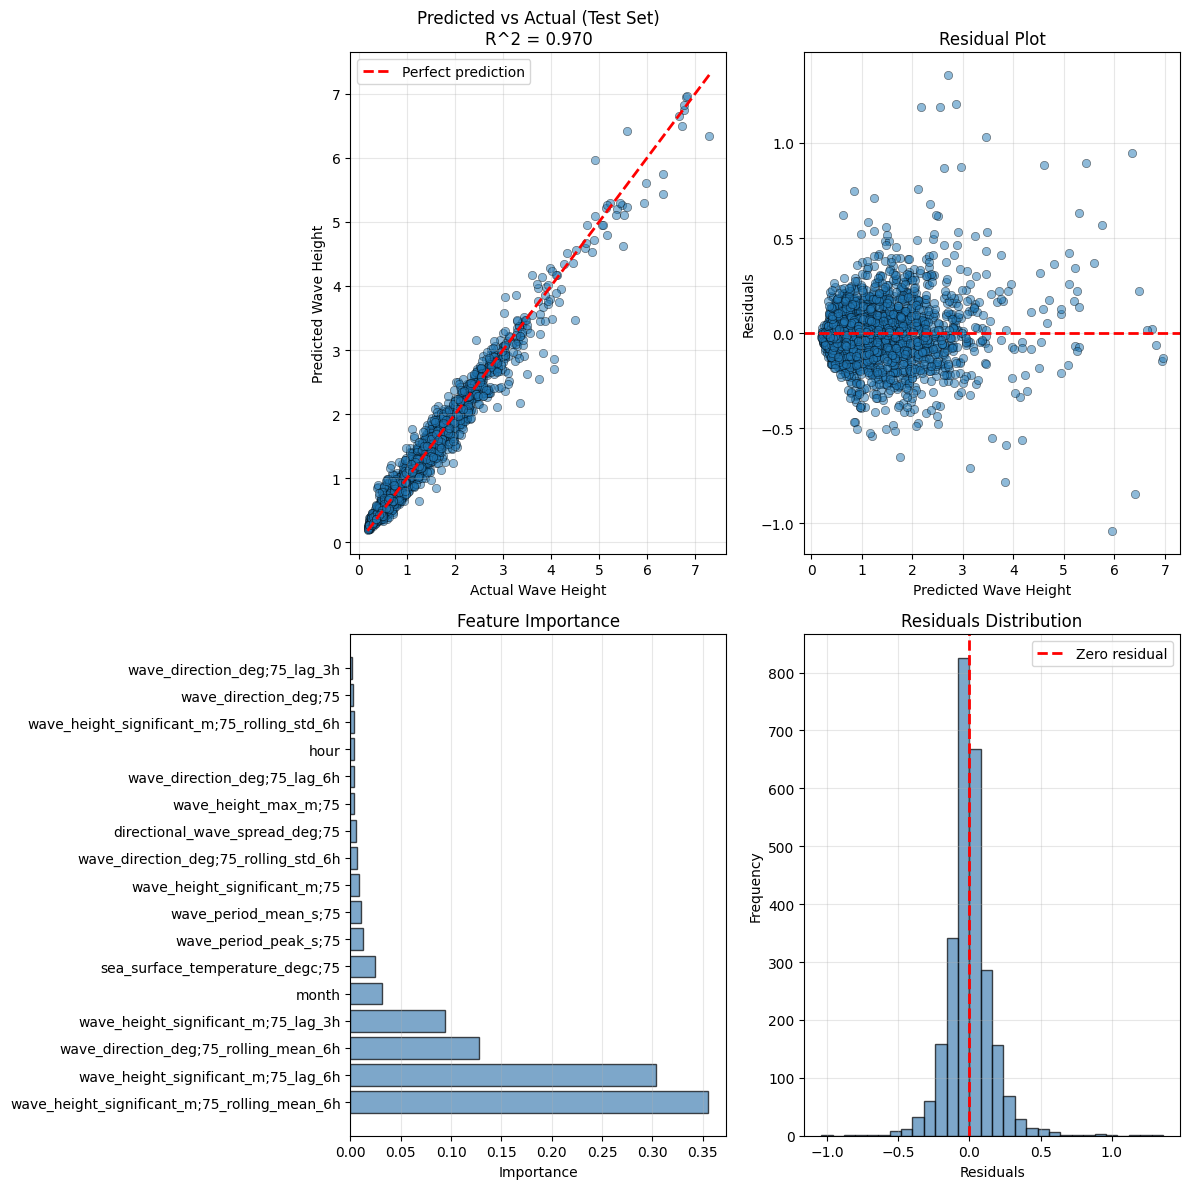

In [8]:
from marine_ml.helpers.optuna_helper import train_with_optuna_rf

model_uri = train_with_optuna_rf(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
)

In addition to MLflow, the model is saved to file, for convenient loading.

Make a prediction...

In [9]:
from marine_ml.serve import model_service

with (MODEL_DIR / "model.pkl").open("rb") as f:
    model = pickle.load(f)

features = {
    "directional_wave_spread_deg;75": 20.0,
    "hour": np.int32(7),
    "month": np.int32(12),
    "sea_surface_temperature_degc;75": 11.5,
    "wave_direction_deg;75": 180.0,
    "wave_direction_deg;75_lag_3h": 170.0,
    "wave_direction_deg;75_lag_6h": 168.0,
    "wave_direction_deg;75_rolling_mean_6h": 175.0,
    "wave_direction_deg;75_rolling_std_6h": 5.0,
    "wave_height_max_m;75": 2.4,
    "wave_height_significant_m;75": 1.8,
    "wave_height_significant_m;75_lag_3h": 1.7,
    "wave_height_significant_m;75_lag_6h": 1.6,
    "wave_height_significant_m;75_rolling_mean_6h": 1.6,
    "wave_height_significant_m;75_rolling_std_6h": 0.1,
    "wave_period_mean_s;75": 12.0,
    "wave_period_peak_s;75": 18.0,
}

wave_height_pred = model_service.predict(features)  # ty: ignore[invalid-argument-type]
print(f"Predicted wave height (m): {np.round(wave_height_pred, decimals=2)}")

INFO:marine_ml.serve:Loading model from MLflow Registry: models:/model-pz-to-lev/Production
INFO:marine_ml.serve:Loaded model version 61 from 'Production' stage


Predicted wave height (m): 2.94


In [10]:
%%bash
# Stop MLflow UI
poe mlflow-stop

Poe => pkill -f 'mlflow'
